#### Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Titanic_dataset.xlsx')
data.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,939,NaN,186,3,28,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [3]:
# To find out which column has a null value
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

#### Dealing with null value

In [4]:
def replace_nan_with_avg(col):
    avg = data[col].mean()
    round(avg, 2)
    data[col].fillna(avg, inplace=True)

replace_nan_with_avg('age')
replace_nan_with_avg('fare')

In [5]:
data['embarked'].fillna(data['embarked'].mode()[0], inplace=True)

#### Dropping irrelevant variable

In [6]:
# Separating the inputs and the targets
inputs = data.drop(columns=['survived', 'name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'], axis = 1, inplace= False)
targets = data['survived']

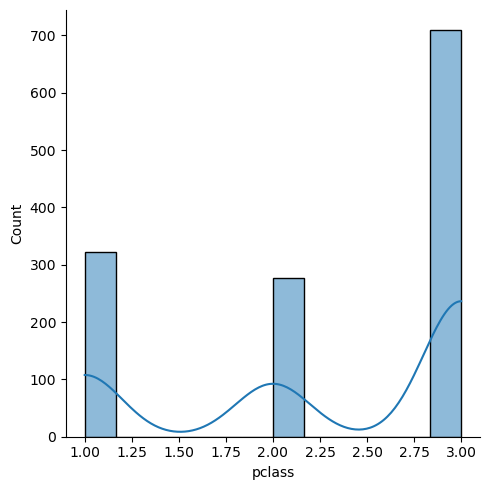

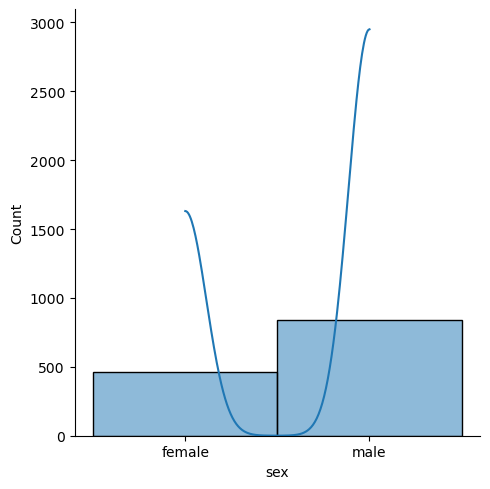

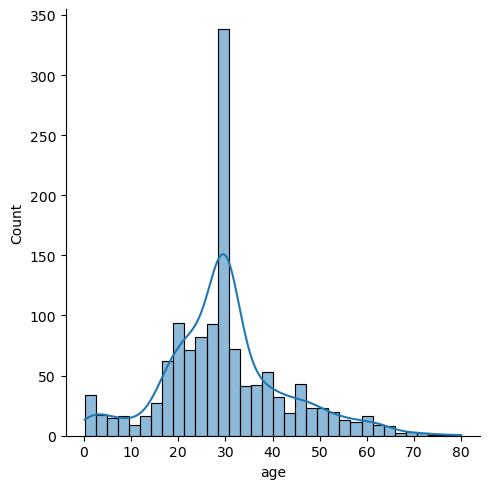

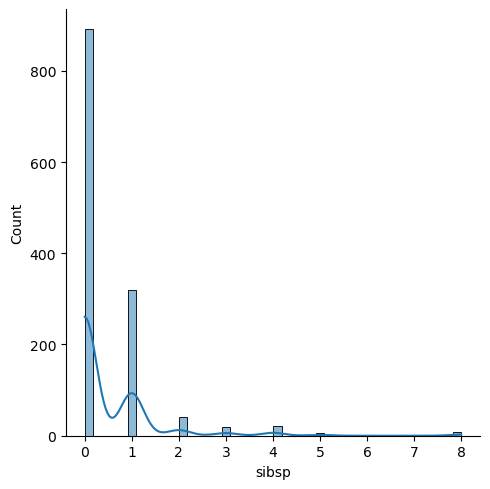

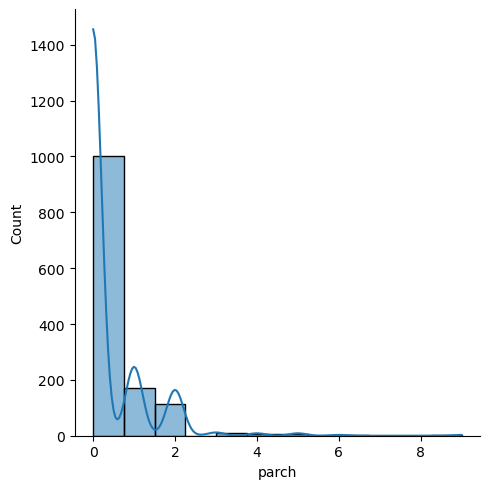

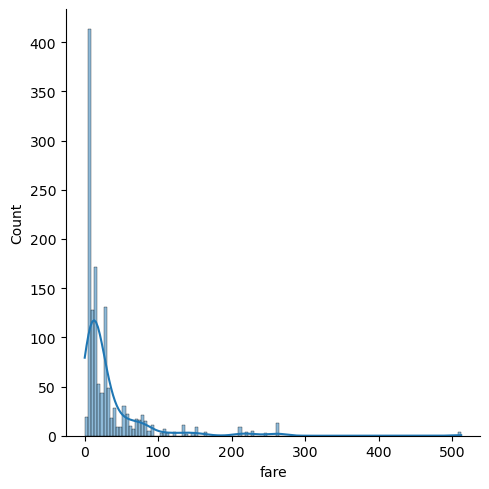

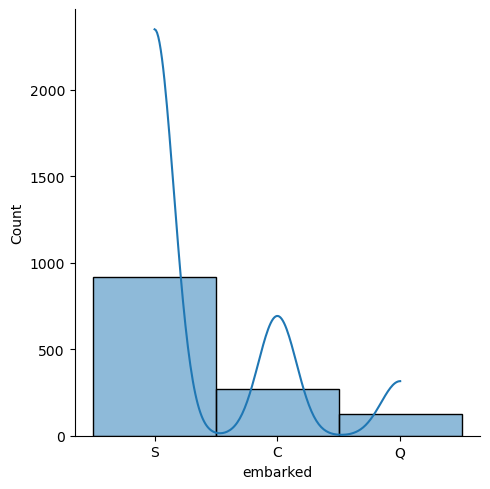

In [7]:
# Visualizing the inputs columns
for col in inputs:
    sns.displot(inputs[col], kde='True')

#### Balancing the dataset

In [8]:
ones = int(targets.sum())
zeros_counter = 0
indices_to_remove = []
for i in range(targets.shape[0]):
    if targets[i] == 0:
        zeros_counter += 1
        if zeros_counter > ones:
            indices_to_remove.append(i)

balanced_inputs = inputs.drop(indices_to_remove, axis=0, inplace = False)
balanced_targets = targets.drop(indices_to_remove, axis=0, inplace = False)

In [9]:
# To create the dummy variables
inputs_with_dummies = pd.get_dummies(balanced_inputs, drop_first=True)
inputs_with_dummies

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1,29.0000,0,0,211.3375,0,0,1
1,1,0.9167,1,2,151.5500,1,0,1
2,1,2.0000,1,2,151.5500,0,0,1
3,1,30.0000,1,2,151.5500,1,0,1
4,1,25.0000,1,2,151.5500,0,0,1
...,...,...,...,...,...,...,...,...
1261,3,63.0000,0,0,9.5875,0,0,1
1277,3,22.0000,0,0,7.2250,1,0,0
1286,3,38.0000,0,0,7.2292,0,0,0
1290,3,47.0000,1,0,7.0000,0,0,1


#### Scaling the dataset

In [10]:
def scale_specific_variable(variable):
    scaled_var = preprocessing.scale(inputs_with_dummies[variable])
    inputs_with_dummies[variable] = scaled_var

scale_specific_variable('age')
scale_specific_variable('fare')

In [11]:
# Checking the data type of inputs and targets
print(type(inputs_with_dummies))
print(type(balanced_targets))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [12]:
# Converting the datasets into pd.DataFrame data type 
scaled_inputs = pd.DataFrame(inputs_with_dummies)
balanced_targets = pd.DataFrame(balanced_targets)

#### Shuffling the dataset

In [13]:
shuffled_indices = np.arange(scaled_inputs.shape[0])
np.random.shuffle(shuffled_indices)

shuffled_inputs = scaled_inputs.iloc[shuffled_indices]
shuffled_targets = balanced_targets.iloc[shuffled_indices]

#### Splitting the dataset into train test subsets

In [14]:
inputs_train, inputs_test, targets_train, targets_test = train_test_split(shuffled_inputs, shuffled_targets, test_size = 0.2, random_state = 0)

In [15]:
# Checking the shape of train and test subset of input variable
inputs_train.shape, inputs_test.shape

((800, 8), (200, 8))

In [16]:
targets_train = targets_train.values.ravel()

#### Building a logistic regression model

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg_params = {'C': [0.1,0.5,1]} 
logreg = LogisticRegression()
logreg_gsv = GridSearchCV(estimator=logreg, param_grid=logreg_params)
logreg_gsv.fit(inputs_train, targets_train)

GridSearchCV(estimator=LogisticRegression(), param_grid={'C': [0.1, 0.5, 1]})

In [18]:
logreg_model = logreg_gsv.best_estimator_
logreg_model.fit(inputs_train, targets_train)

LogisticRegression(C=0.5)

In [20]:
# Checking the model accuracy, the true accuracy is Test Set Score
# Similarly, the accuracy of other models are also calculated and stored in a variable to compare

LR_train_score = logreg_model.score(inputs_train, targets_train)*100
LR_test_score = logreg_model.score(inputs_test, targets_test)*100

print('Training set score: {:.2f}'.format(LR_train_score))
print('Test set score: {:.2f}'.format(LR_test_score))

Training set score: 78.12
Test set score: 79.50


#### Building SVM model

In [26]:
from sklearn.svm import SVC
svm_params = {
    'kernel': ['rbf'],
    'C': [0.1, 0.01, 1]
}
svm = SVC(random_state=1)
svm_gsv = GridSearchCV(estimator=svm, param_grid=svm_params)
svm_gsv.fit(inputs_train, targets_train)

GridSearchCV(estimator=SVC(random_state=1),
             param_grid={'C': [0.1, 0.01, 1], 'kernel': ['rbf']})

In [27]:
svm_model = svm_gsv.best_estimator_
svm_model.fit(inputs_train, targets_train)

SVC(C=1, random_state=1)

In [29]:
SVM_train_score = svm_model.score(inputs_train, targets_train)*100
SVM_test_score = svm_model.score(inputs_test, targets_test)*100

print('Training set score: {:.2f}'.format(svm_model.score(inputs_train, targets_train)*100))
print('Test set score: {:.2f}'.format(svm_model.score(inputs_test, targets_test)*100))

Training set score: 81.00
Test set score: 80.00


#### Building KNN model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn_params = {
    'n_neighbors': [5,8,10],
    'p': [1,2],
    'metric': ['minkowski']
}
knn = KNeighborsClassifier()
knn_gsv = GridSearchCV(estimator=knn, param_grid=knn_params)
knn_gsv.fit(inputs_train, targets_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski'], 'n_neighbors': [5, 8, 10],
                         'p': [1, 2]})

In [33]:
knn_model = knn_gsv.best_estimator_
knn_model.fit(inputs_train, targets_train)

KNeighborsClassifier(p=1)

In [34]:
KNN_train_score = knn_model.score(inputs_train, targets_train)*100
KNN_test_score = knn_model.score(inputs_test, targets_test)*100

print('Training set score: {:.2f}'.format(KNN_train_score))
print('Test set score: {:.2f}'.format(KNN_test_score))

Training set score: 83.50
Test set score: 77.50


#### Building Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(inputs_train, targets_train)

GaussianNB()

In [36]:
NB_train_score = nb.score(inputs_train, targets_train)*100
NB_test_score = nb.score(inputs_test, targets_test)*100

print('Training set score: {:.2f}'.format(nb.score(inputs_train, targets_train)*100))
print('Test set score: {:.2f}'.format(nb.score(inputs_test, targets_test)*100))

Training set score: 76.50
Test set score: 78.50


#### Creating a df to visualize the accuracy of each model

In [37]:
model_summary = pd.DataFrame({'Model': ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbour', 'Support Vector Machine'],
                              'Train Accuracy': [LR_train_score, NB_train_score, KNN_train_score, SVM_train_score],
                             'Test Accuracy': [LR_test_score, NB_test_score, KNN_test_score, SVM_test_score]
                             })
model_summary

,Model,Train Accuracy,Test Accuracy
0,Logistic Regression,78.125,79.5
1,Naive Bayes,76.500,78.5
2,K-Nearest Neighbour,83.500,77.5
3,Support Vector Machine,81.000,80.0


### The Support Vector Machine seems to have performed well than other models, The appropriate model for this analysis would be SVM model